In this case study I have worked on a fitness dataset of a smart device.
Bellabeat app, which provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits

The data set includes minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID or timestamp. Which can be divided into 3 groups: 1. data in minute-level ; 2. data in hour-level ; 3. merged summary data. For this analysis, merged summary data will be mainly applied with the support of data at minute/hour-level.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1)Importing libraries

In [3]:
import numpy as np 
import pandas as pd

In [4]:
import re 
import math
import warnings
warnings.filterwarnings("ignore")

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2)Data uploading

In [6]:
##Daily activities
dailyactivity=pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv',parse_dates={'Date': [1]})


In [48]:
#preview the data
dailyactivity.head()

,Date,Day,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,2016-04-12,Tuesday,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,2016-04-13,Wednesday,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,2016-04-14,Thursday,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,2016-04-15,Friday,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,2016-04-16,Saturday,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [8]:
##Sleep day
sleepday=pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv',parse_dates={'Date':[1]})

In [9]:
#preview the data
sleepday.head()

,Date,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,1503960366,1,327,346
1,2016-04-13,1503960366,2,384,407
2,2016-04-15,1503960366,1,412,442
3,2016-04-16,1503960366,2,340,367
4,2016-04-17,1503960366,1,700,712


In [10]:
dailyactivity.insert(1,'Day', dailyactivity['Date'].dt.day_name())
dailyactivity.head()

,Date,Day,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,2016-04-12,Tuesday,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,2016-04-13,Wednesday,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,2016-04-14,Thursday,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,2016-04-15,Friday,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,2016-04-16,Saturday,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
#checking no of rows and columns in dataset
dailyactivity.shape

In [12]:
sleepday.insert(1,'Day',sleepday['Date'].dt.day_name())
sleepday.head()

,Date,Day,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,Tuesday,1503960366,1,327,346
1,2016-04-13,Wednesday,1503960366,2,384,407
2,2016-04-15,Friday,1503960366,1,412,442
3,2016-04-16,Saturday,1503960366,2,340,367
4,2016-04-17,Sunday,1503960366,1,700,712


In [13]:
#checking no of rows and columns in dataset
sleepday.shape

(413, 6)

In [14]:
#describing the daily activities dataset
dailyactivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [43]:
#information about daily activities dataset
dailyactivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      940 non-null    datetime64[ns]
 1   Day                       940 non-null    object        
 2   Id                        940 non-null    int64         
 3   TotalSteps                940 non-null    int64         
 4   TotalDistance             940 non-null    float64       
 5   TrackerDistance           940 non-null    float64       
 6   LoggedActivitiesDistance  940 non-null    float64       
 7   VeryActiveDistance        940 non-null    float64       
 8   ModeratelyActiveDistance  940 non-null    float64       
 9   LightActiveDistance       940 non-null    float64       
 10  SedentaryActiveDistance   940 non-null    float64       
 11  VeryActiveMinutes         940 non-null    int64         
 12  FairlyActiveMinutes   

In [44]:
#checking for null values
dailyactivity.isnull().sum()

Date                        0
Day                         0
Id                          0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [17]:
dailyactivity.Id.value_counts()

1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

In [18]:
dailyactivity.Date.value_counts()

2016-04-12    33
2016-04-14    33
2016-04-15    33
2016-04-13    33
2016-04-23    32
2016-04-29    32
2016-04-28    32
2016-04-26    32
2016-04-25    32
2016-04-24    32
2016-04-27    32
2016-04-22    32
2016-04-20    32
2016-04-19    32
2016-04-18    32
2016-04-17    32
2016-04-16    32
2016-04-21    32
2016-04-30    31
2016-05-01    30
2016-05-05    29
2016-05-07    29
2016-05-06    29
2016-05-03    29
2016-05-04    29
2016-05-02    29
2016-05-08    27
2016-05-09    27
2016-05-10    26
2016-05-11    24
2016-05-12    21
Name: Date, dtype: int64

In [45]:
#preview the dataset
sleepday.head()

,Date,Day,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,Tuesday,1503960366,1,327,346
1,2016-04-13,Wednesday,1503960366,2,384,407
2,2016-04-15,Friday,1503960366,1,412,442
3,2016-04-16,Saturday,1503960366,2,340,367
4,2016-04-17,Sunday,1503960366,1,700,712


In [46]:
#describing the sleepday dataset
sleepday.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [47]:
#information of sleepday dataset
sleepday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                413 non-null    datetime64[ns]
 1   Day                 413 non-null    object        
 2   Id                  413 non-null    int64         
 3   TotalSleepRecords   413 non-null    int64         
 4   TotalMinutesAsleep  413 non-null    int64         
 5   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 19.5+ KB


In [22]:

#checking for any null values
sleepday.isnull().sum()

Date                  0
Day                   0
Id                    0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [23]:
sleepday.Id.value_counts()

8378563200    32
6962181067    31
5553957443    31
4702921684    28
2026352035    28
3977333714    28
4445114986    28
5577150313    26
4319703577    26
1503960366    25
7086361926    24
4388161847    24
6117666160    18
8792009665    15
2347167796    15
4020332650     8
1927972279     5
4558609924     5
1644430081     4
6775888955     3
8053475328     3
1844505072     3
7007744171     2
2320127002     1
Name: Id, dtype: int64

In [24]:
sleepday.Date.value_counts()

2016-04-15    17
2016-05-01    16
2016-04-28    16
2016-04-30    15
2016-04-20    15
2016-04-21    15
2016-04-23    15
2016-04-29    15
2016-04-26    14
2016-05-08    14
2016-04-13    14
2016-05-07    14
2016-04-19    14
2016-04-27    14
2016-04-16    14
2016-04-14    13
2016-05-05    13
2016-04-22    13
2016-04-12    13
2016-05-02    13
2016-04-25    13
2016-04-24    13
2016-05-06    12
2016-05-03    12
2016-05-10    12
2016-04-17    12
2016-05-04    12
2016-05-09    11
2016-05-11    11
2016-04-18    10
2016-05-12     8
Name: Date, dtype: int64

# 3)Processing the dataset

In [49]:
#merging the two datasets and analysing it
mergeddf=pd.merge(dailyactivity,sleepday,on=['Id','Date'],how='left')
mergeddf.shape

(943, 20)

In [50]:
#previewing the dataset
mergeddf.head()

,Date,Day_x,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2016-04-12,Tuesday,1503960366,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1.0,327.0,346.0
1,2016-04-13,Wednesday,1503960366,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2.0,384.0,407.0
2,2016-04-14,Thursday,1503960366,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN,NaN
3,2016-04-15,Friday,1503960366,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,1.0,412.0,442.0
4,2016-04-16,Saturday,1503960366,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,2.0,340.0,367.0


In [51]:
#checking for any null values
mergeddf.isnull().sum()

Date                          0
Day_x                         0
Id                            0
TotalSteps                    0
TotalDistance                 0
TrackerDistance               0
LoggedActivitiesDistance      0
VeryActiveDistance            0
ModeratelyActiveDistance      0
LightActiveDistance           0
SedentaryActiveDistance       0
VeryActiveMinutes             0
FairlyActiveMinutes           0
LightlyActiveMinutes          0
SedentaryMinutes              0
Calories                      0
Day_y                       530
TotalSleepRecords           530
TotalMinutesAsleep          530
TotalTimeInBed              530
dtype: int64

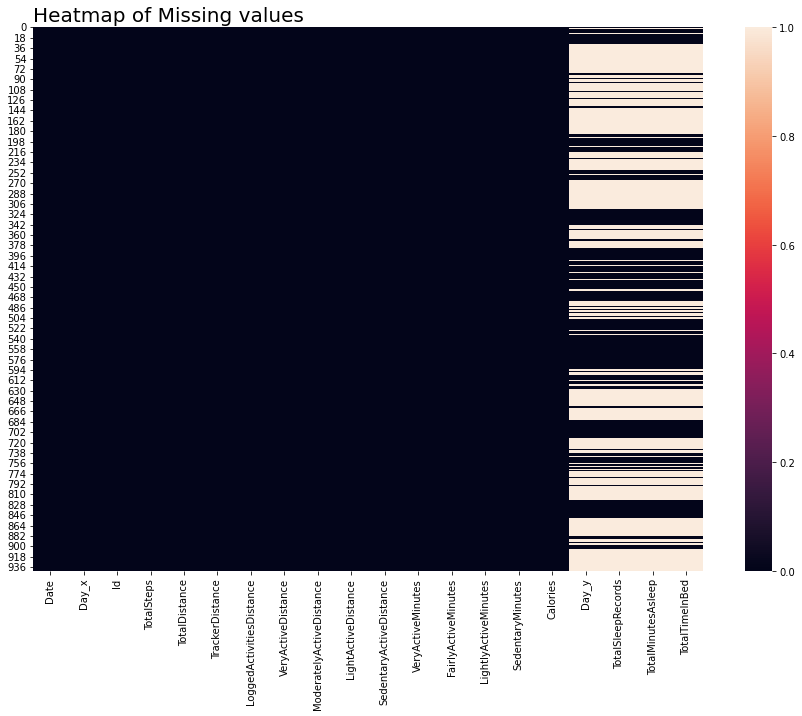

In [52]:
#analysing missing valies in form of heatmap
missing_values=mergeddf.isna()
plt.figure(figsize=(15,10))
sns.heatmap(missing_values)
plt.title('Heatmap of Missing values',fontdict={'fontsize':20},loc='left')
plt.show()

In [53]:
#removing the rows containing null values
mergeddf.dropna(inplace=True)
mergeddf.isnull().sum()

Date                        0
Day_x                       0
Id                          0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Day_y                       0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
dtype: int64

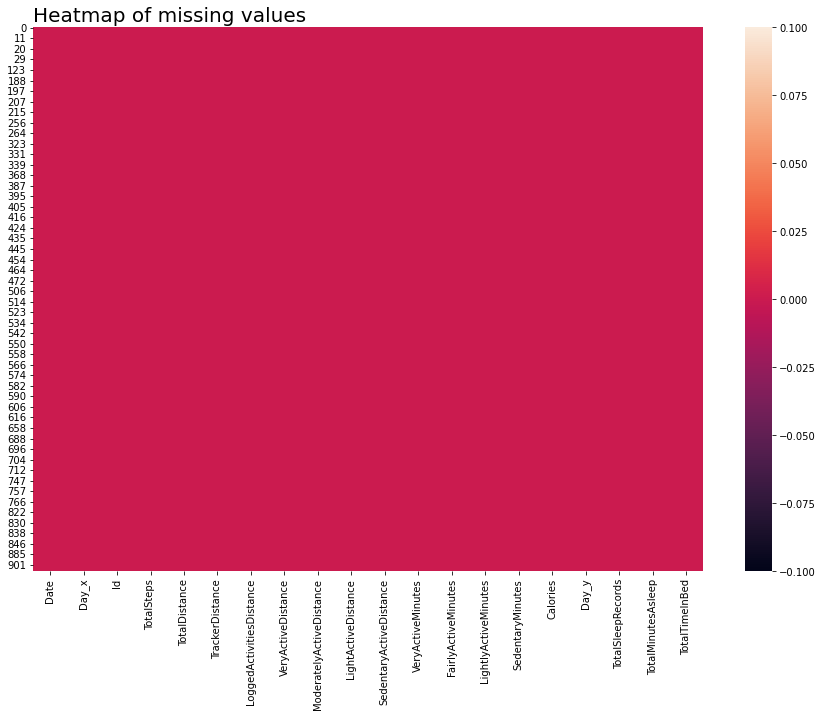

In [30]:
#after removing null values analysing dataset again
missing_values=mergeddf.isna()
plt.figure(figsize=(15,10))
sns.heatmap(missing_values)
plt.title('Heatmap of missing values',fontdict={'fontsize':20},loc='left')
plt.show()

# 4)Share

Insight and graph to prove, just like conclusion

<AxesSubplot:>

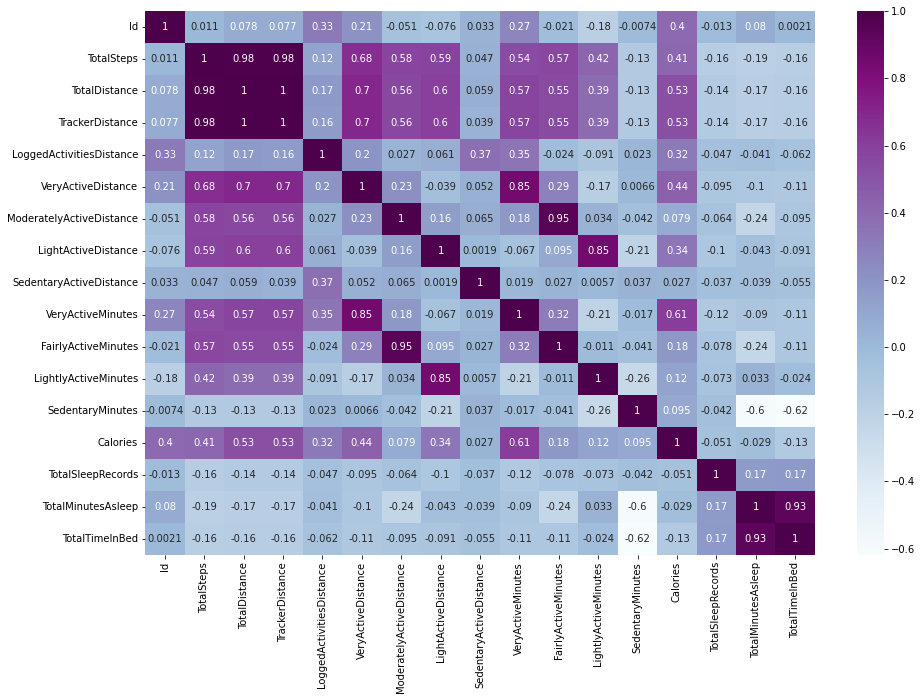

In [54]:
#plotting heatmap for visualising dataset to check how the data is correlated with each other
plt.figure(figsize=(15,10))
mergeddf_corr=mergeddf.corr()
sns.heatmap(data=mergeddf_corr,annot=True,cmap='BuPu')

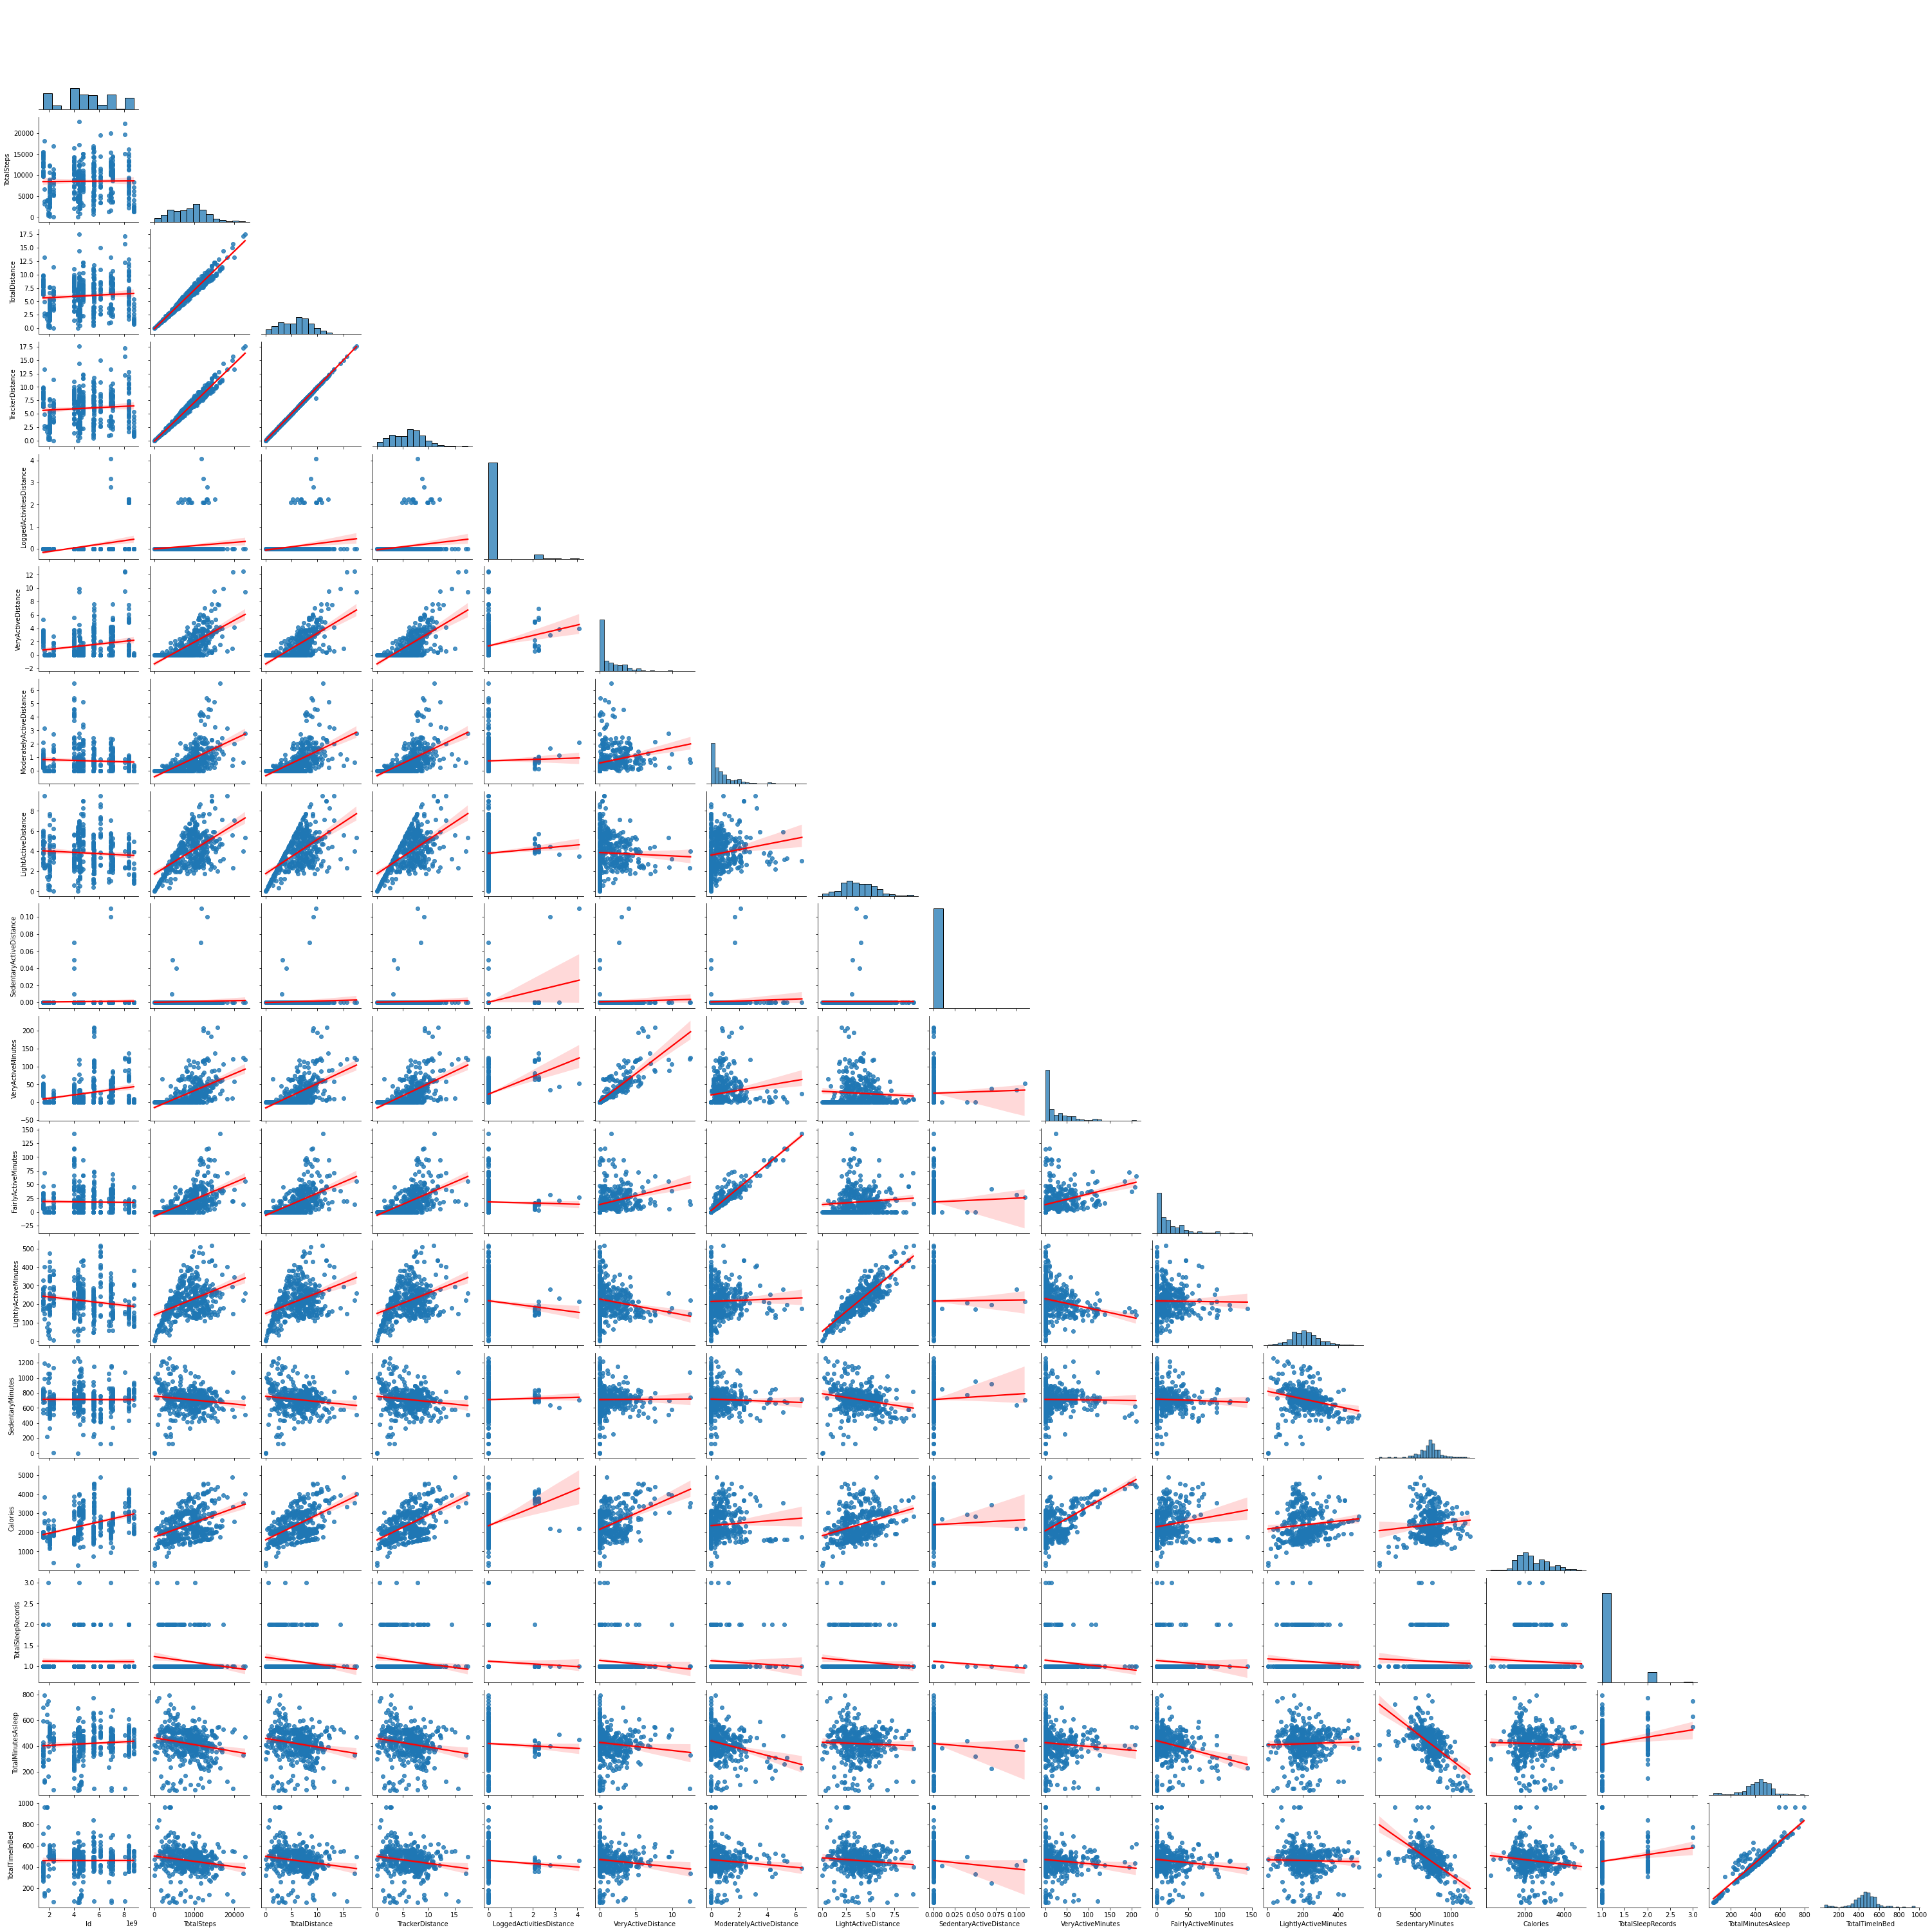

In [55]:
#plotting pairplot to plot multiple pairwise bivariate distribution in dataset
sns.pairplot(data=mergeddf,kind='reg',corner='True',plot_kws={'line_kws':{'color':'red'}})

Text(0.5, 1.0, 'Number of Users in each day')

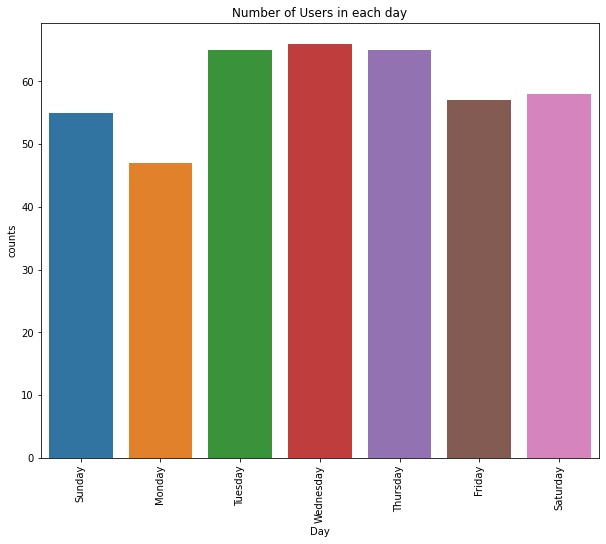

In [34]:
#plotting countplot 
plt.figure(figsize=(10,8))
sns.countplot(x="Day_x",data=mergeddf,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation = 90)
plt.xlabel('Day')
plt.ylabel('counts')
plt.title("Number of Users in each day")


From this above plot, we can observe that most of the users applied the smart devices on Wednesday, Tuesday, and Thursday, normal weekdays.

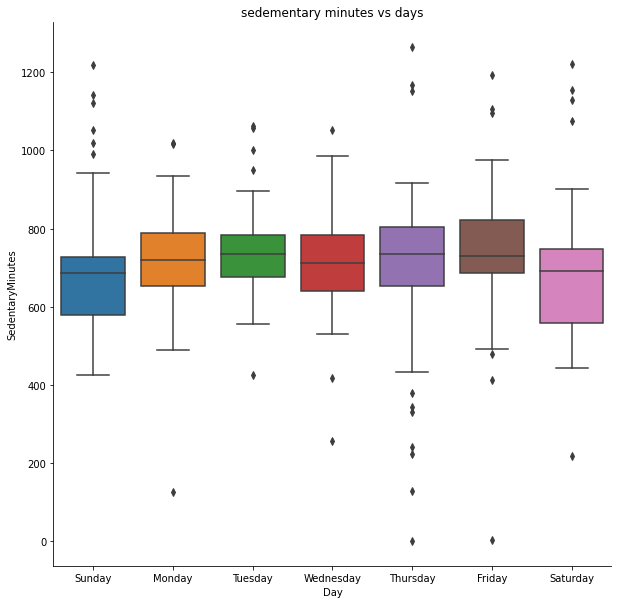

In [56]:
#plotting boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x="Day_x",y="SedentaryMinutes",data=mergeddf,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xlabel('Day')
plt.ylabel('SedentaryMinutes')
plt.title("sedementary minutes vs days")
sns.despine()

From sedentary minutes vs day plot we analysed that users have longer sedentary on weekdays than on weekends may be this is beacause of working in office during weekdays.

Text(0.5, 1.0, 'TotalStepsby users according to days ')

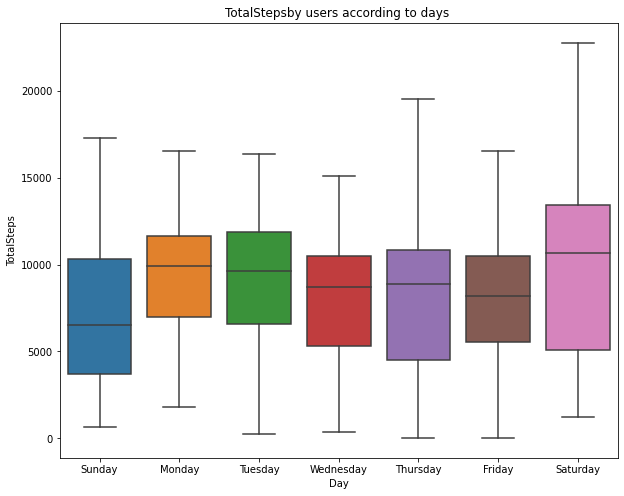

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Day_x",y="TotalSteps",data=mergeddf,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xlabel('Day')
plt.ylabel('TotalSteps')
plt.title("TotalStepsby users according to days ")


from above plot we understood that people prefer to walk most on saturday and least on sunday.

Text(0.5, 1.0, 'TotalMinutesAsleep users according to days ')

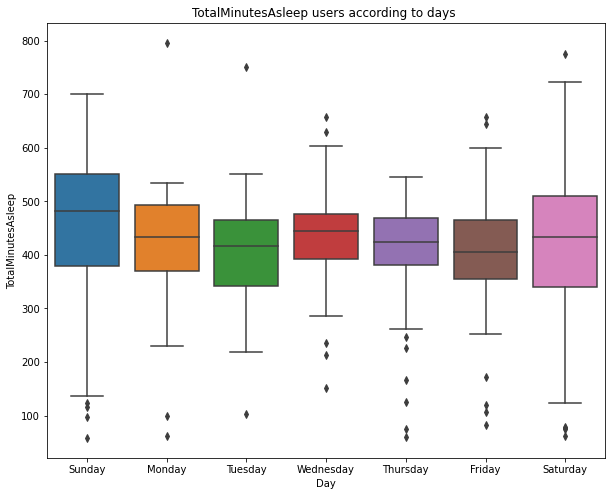

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Day_x",y="TotalMinutesAsleep",data=mergeddf,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xlabel('Day')
plt.ylabel('TotalMinutesAsleep')
plt.title("TotalMinutesAsleep users according to days ")


The box shows that users tend to have a longer sleep time on the weekend when compares with the sleeping time on weekday.

Text(0.0, 1.0, 'Total distance vs calories burnt')

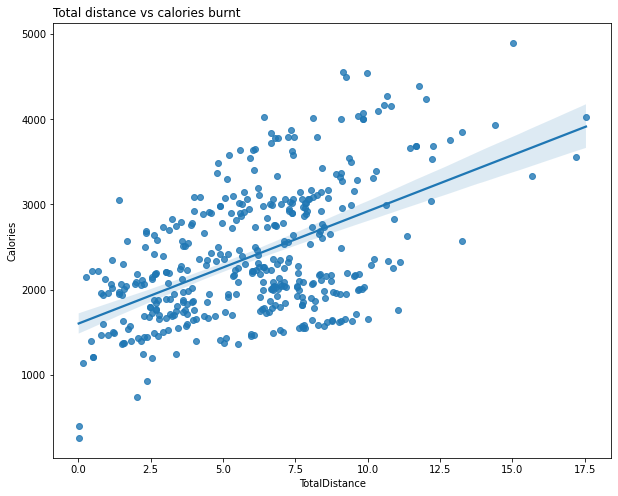

In [57]:
#draw regplot
plt.figure(figsize=(10,8))
sns.regplot(x="TotalDistance",y="Calories",scatter=True,data=mergeddf)
plt.title('Total distance vs calories burnt',loc='Left')

Text(0.0, 1.0, 'Total minutes asleep vs total steps covered')

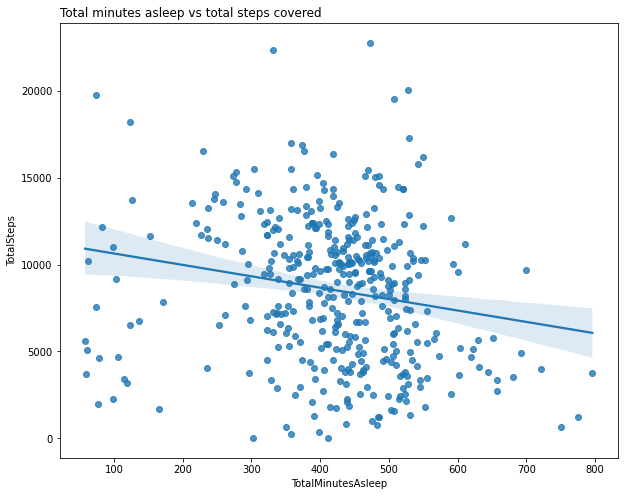

In [39]:
#draw regplot
plt.figure(figsize=(10,8))
sns.regplot(x='TotalMinutesAsleep',y='TotalSteps',scatter=True,data=mergeddf)
plt.title('Total minutes asleep vs total steps covered',loc='Left')

More walking will burn more calories than less walking.

In [40]:
mergeddf['TotalMinutes']=mergeddf['VeryActiveMinutes']+mergeddf['FairlyActiveMinutes']+mergeddf['LightlyActiveMinutes']+mergeddf['SedentaryMinutes']
mergeddf['TotalMinutes']

0      1094
1      1033
3       998
4      1040
5       761
       ... 
901    1080
902     913
903    1017
904     895
905     977
Name: TotalMinutes, Length: 413, dtype: int64

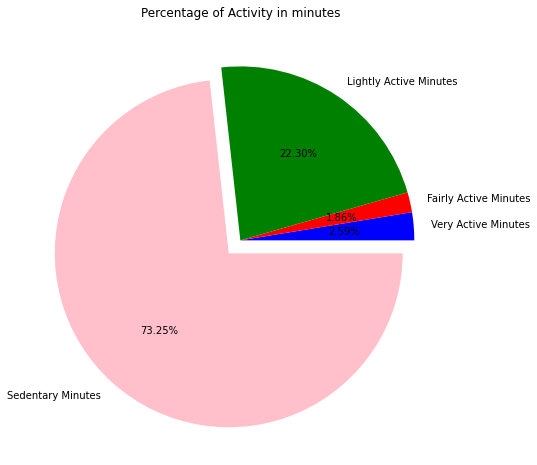

In [41]:
#Getting percentage for overall minutes used a day
Total_Minutes_mean=mergeddf['TotalMinutes'].mean()
VAM_mean=(mergeddf['VeryActiveMinutes'].mean()*100)/Total_Minutes_mean
FAM_mean=(mergeddf['FairlyActiveMinutes'].mean()*100)/Total_Minutes_mean
LAM_mean=(mergeddf['LightlyActiveMinutes'].mean()*100)/Total_Minutes_mean
SM_mean=(mergeddf['SedentaryMinutes'].mean()*100)/Total_Minutes_mean

#plotting a pie chart for minutes used by user in a day
plt.figure(figsize=(10,8))
plt.pie([VAM_mean,FAM_mean,LAM_mean,SM_mean],
        labels=['Very Active Minutes','Fairly Active Minutes','Lightly Active Minutes','Sedentary Minutes'],
        colors=['BLUE','RED','GREEN','PINK'],autopct='%.2f%%',explode = [0, 0, 0, 0.1])
plt.title('Percentage of Activity in minutes')
plt.show()

VeryActiveDistance ModeratelyActiveDistance LightActiveDistance SedentaryActiveDistance

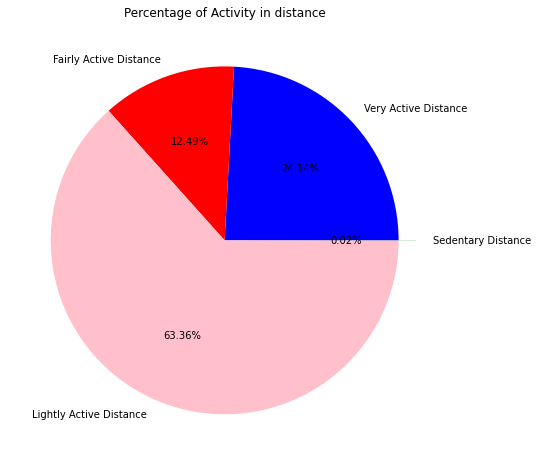

In [42]:
#Getting percentage for overall distance walked a day
Total_distance_mean=mergeddf['TotalDistance'].mean()
VAD_mean=(mergeddf['VeryActiveDistance'].mean()*100)/Total_distance_mean
MAD_mean=(mergeddf['ModeratelyActiveDistance'].mean()*100)/Total_distance_mean
LAD_mean=(mergeddf['LightActiveDistance'].mean()*100)/Total_distance_mean
SAD_mean=(mergeddf['SedentaryActiveDistance'].mean()*100)/Total_distance_mean

#plotting pie chart for distance walked a day
plt.figure(figsize=(10,8))
plt.pie([VAD_mean,MAD_mean,LAD_mean,SAD_mean],
        labels=['Very Active Distance','Fairly Active Distance','Lightly Active Distance','Sedentary Distance'],
        colors=['BLUE','RED','PINK','GREEN'],autopct='%.2f%%',explode = [0, 0, 0, 0.1])
plt.title('Percentage of Activity in distance')
plt.show()